# Visualisation and Preprocessing

## 1.0 Load Libraries

In [1]:
print ('Loading libraries ...')

import os

import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

import config
import utils

Loading libraries ...


## 2.0 Load Dataset

In [2]:
dataset = 'facies_data.csv'
data = pd.read_csv(dataset)
data.drop_duplicates().reset_index(drop=True)
data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


## 3.0 Visualisation

Logs are usually represented in some form of line graph that operators can interprete. Let's transform our log readings into such graphs. We can also assign colors to the facies classes and attach a plot of the facies classes in a well from our dataset to the graph of its log readings. First, lets get the function that creates the plots we have just described and set it up inn our utils file. Then we can call the function to make the plots in this notebook.

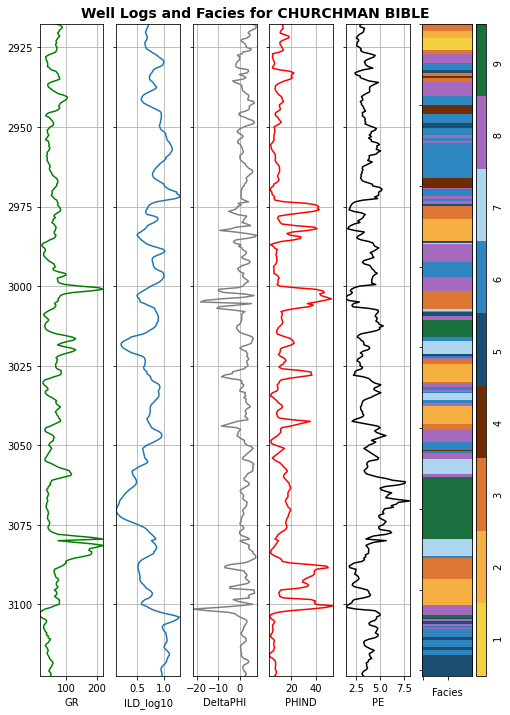

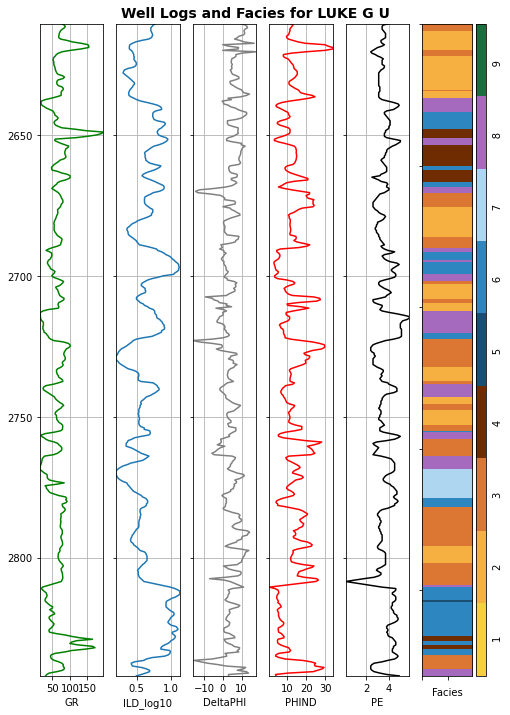

In [3]:
facies_colors = config.FACIES_COLORS
utils.make_facies_log_plot(
    data[data['Well Name'] == 'CHURCHMAN BIBLE'],
    facies_colors)

utils.make_facies_log_plot(
    data[data['Well Name'] == 'LUKE G U'],
    facies_colors)

## 4.0 Preprocess

From our EDA notebook, we observed the skewed distribution of the numerical features of our dataset. In this preprocessing step, we want to reduce this skewness.

Let us see the skewedness of the data.

In [4]:
numerical_columns = data.drop(['Facies', 'Formation', 'Well Name'], axis =1).columns
numerical_columns

Index(['Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M',
       'RELPOS'],
      dtype='object')

In [5]:
skewed_dict = {}
for column in numerical_columns:
    skewed_dict[column] = data[column].skew()
skewed_df = pd.DataFrame(skewed_dict.items(), columns=['feature', 'skewness'])
skewed_df

,feature,skewness
0,Depth,-0.406834
1,GR,2.271149
2,ILD_log10,0.033385
3,DeltaPHI,-0.813515
4,PHIND,2.241312
5,PE,0.661600
6,NM_M,0.006191
7,RELPOS,-0.032563


Let us now apply the functionn to reduce the skewedness of the data.

In [6]:
data = utils.unskew(data)

/Users/obikacd/opt/miniconda3/envs/facies_classes/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/obikacd/opt/miniconda3/envs/facies_classes/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


We can generate the skewedness dataframe again and compare results with the original skewedness of the data. It can be observed that the skewedness have been reduced. The histogram of the new data will show the improvement in the distribution of the numerical data.

In [7]:
reskewed_dict = {}
for column in numerical_columns:
    reskewed_dict[column] = data[column].skew()
reskewed_df = pd.DataFrame(reskewed_dict.items(), columns=['feature', 'skewness'])
reskewed_df

,feature,skewness
0,Depth,-0.073874
1,GR,0.061568
2,ILD_log10,0.033385
3,DeltaPHI,NaN
4,PHIND,0.006202
5,PE,0.063984
6,NM_M,0.006191
7,RELPOS,-0.032563


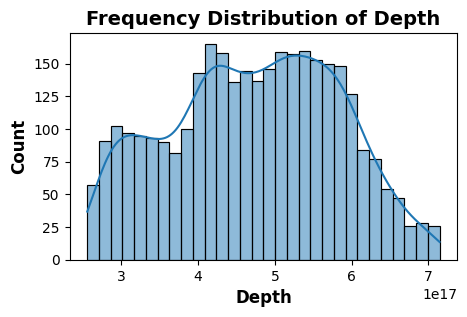

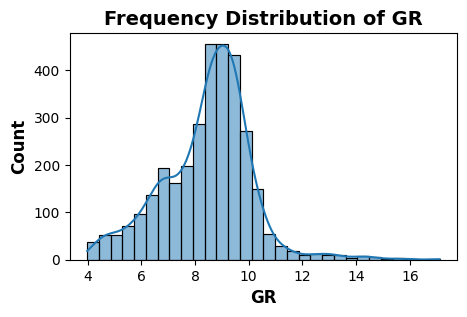

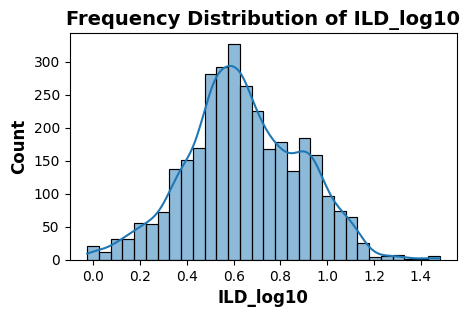

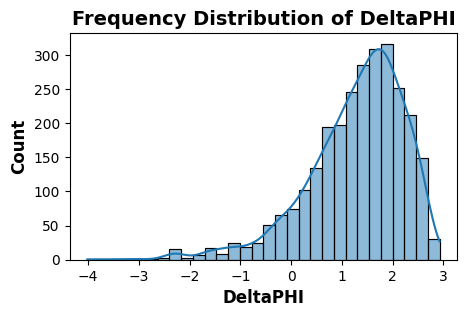

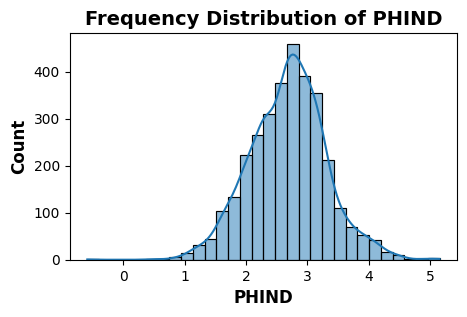

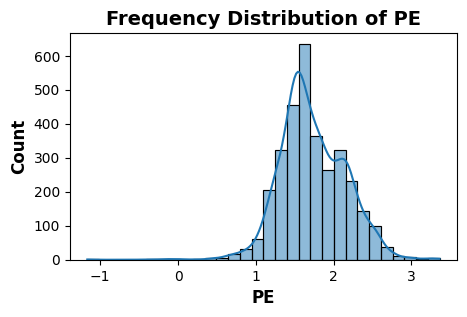

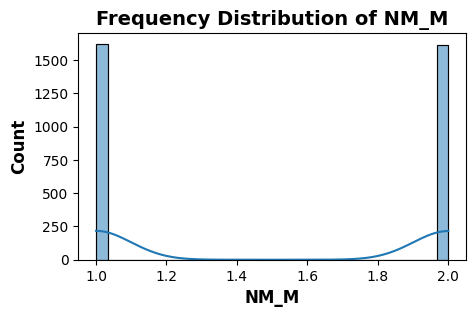

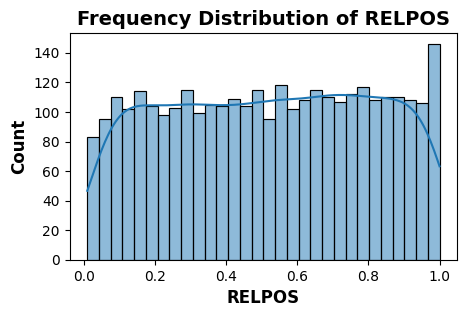

In [8]:
for column in numerical_columns:
    utils.UniAnalysis(data).create_histplot(column, 30)

Let's see how the values of our data has changed after applying the skewedness reduction function.

In [9]:
data

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,3.948487e+17,9.315138,0.664,2.292535,2.692814,2.144507,1,1.000
1,3,A1 SH,SHRIMPLIN,3.952246e+17,9.356117,0.661,2.653242,2.755519,1.930267,1,0.979
2,3,A1 SH,SHRIMPLIN,3.956009e+17,9.395806,0.658,2.694627,2.800363,1.700362,1,0.957
3,3,A1 SH,SHRIMPLIN,3.959774e+17,9.738498,0.655,2.631889,2.806255,1.652208,1,0.936
4,3,A1 SH,SHRIMPLIN,3.963543e+17,9.167531,0.647,2.602690,2.822874,1.603254,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
3227,5,C LM,CHURCHMAN BIBLE,7.119542e+17,7.477491,0.947,0.603222,2.117532,1.708472,2,0.685
3228,5,C LM,CHURCHMAN BIBLE,7.125609e+17,7.320204,0.953,0.806922,2.231382,1.575476,2,0.677
3229,5,C LM,CHURCHMAN BIBLE,7.131681e+17,7.688281,0.964,1.073294,2.231382,1.497674,2,0.669
3230,5,C LM,CHURCHMAN BIBLE,7.137757e+17,7.807242,0.965,1.125903,2.186895,1.478144,2,0.661


## Next Step
- Modelling